# Test Types
In this visuals we want to discorer the following

* Visualize what test types are being used the most.
* Visualize what test types give the most issues(blast and linter)
* Visualize the top 20 linting errors per linting type
* Visualize blast and linting apart

importing libararies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from cleaning import read_data, clean_linting_results, clean_review_test_results, clean_data_reviewss, clean_data_exercises, clean_data_code_blast_tests


# Cleaned data

In [2]:
read_linting_results, read_review_test_results, read_reviews, data_tests, read_code_blast_tests, read_exercises, data_implementation_exercise = read_data()

data_linting_result = clean_linting_results(read_linting_results)
data_review_test_results = clean_review_test_results(read_review_test_results)
data_reviews = clean_data_reviewss(read_reviews)
data_exercises = clean_data_exercises(read_exercises)
data_code_blast_tests = clean_data_code_blast_tests(read_code_blast_tests)

In [3]:
linting_error_codes = data_linting_result['message'].value_counts()
linting_error_codes.head(20)

The value of the “for” attribute of the “label” element must be the ID of a non-hidden form control.    25289
 Unexpected token.                                                                                      24405
Missing semicolon.                                                                                      24213
Expected indentation of 4 spaces but found 2.                                                           20769
Expected at least 1 space before "."; 0 found                                                           19739
Element “head” is missing a required instance of child element “title”.                                 19311
 Unexpected beginning of statement.                                                                     18179
Trailing spaces not allowed.                                                                            16970
Expected at least 1 space after "."; 0 found                                                            16569
Expected 1

In [4]:
linting_error_codes

The value of the “for” attribute of the “label” element must be the ID of a non-hidden form control.     25289
 Unexpected token.                                                                                       24405
Missing semicolon.                                                                                       24213
Expected indentation of 4 spaces but found 2.                                                            20769
Expected at least 1 space before "."; 0 found                                                            19739
                                                                                                         ...  
Closing brace indented incorrectly; expected 75 spaces, found 46                                             1
Line indented incorrectly; expected 75 spaces, found 46                                                      1
CSS: “ ”: Parse Error.                                                                                       1
c

In [5]:
data_review_test_results

,blast_review_id,test_id,human_error_message,test_language
0,00001c9e-f8a5-4b92-8c94-b02f2209c968,156effcd-27f9-11ec-abc5-4213e7ee7fac,Je gebruikt echt `DELETE` in je SQL bestand,nl
1,00002312-66bf-4c25-94fe-d8b9def65fcd,8b2a55a4-2845-11ed-b4d0-4213e7ee7fac,NaN,nl
2,00002312-66bf-4c25-94fe-d8b9def65fcd,8b2a55a4-2845-11ed-b4d0-4213e7ee7fac,NaN,nl
3,00002312-66bf-4c25-94fe-d8b9def65fcd,8b2a55a4-2845-11ed-b4d0-4213e7ee7fac,NaN,nl
4,00002312-66bf-4c25-94fe-d8b9def65fcd,8b2a55a4-2845-11ed-b4d0-4213e7ee7fac,NaN,nl
...,...,...,...,...
2227019,ffffed58-5f58-4404-ada4-60492cf25614,3333dedb-afd7-11ea-a2fb-cec41367f4e7,Deze test controleert of jouw programma de str...,nl
2227020,ffffed58-5f58-4404-ada4-60492cf25614,3333dedb-afd7-11ea-a2fb-cec41367f4e7,NaN,nl
2227021,fffff2c9-1435-4a91-891f-047d83e194a9,0df303b2-ae4e-11eb-b248-4213e7ee7fac,NaN,nl
2227022,fffff2c9-1435-4a91-891f-047d83e194a9,601602ce-ae4d-11eb-b248-4213e7ee7fac,NaN,nl


Counting the tests

In [7]:
unique_counts = data_tests["test_type"].value_counts()
unique_counts

PHP_UNIT    410
PYTHON       99
NODE_JS      57
C_SHARP       1
Name: test_type, dtype: int64

How many issues are there?

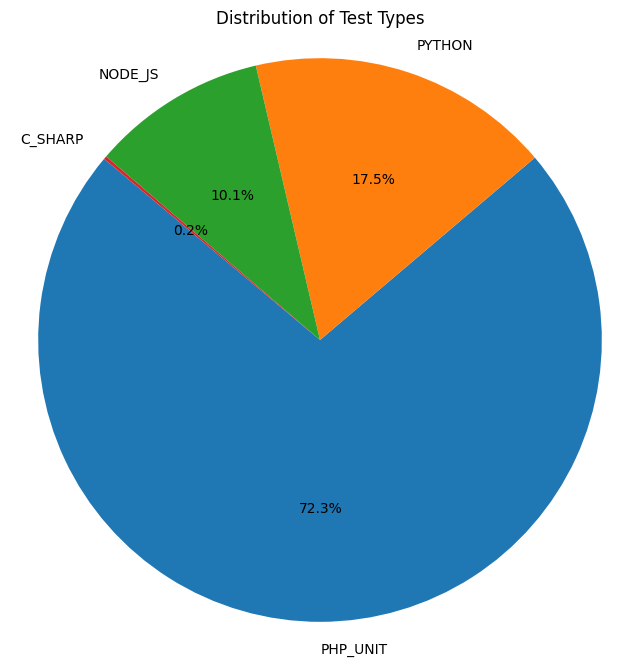

In [8]:
# Assuming you have already calculated unique_counts using value_counts()
unique_counts = data_tests["test_type"].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(unique_counts, labels=unique_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Test Types")
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

# Show the pie chart
plt.show()


This data is unclear, php is sorted into multiple languages. Because of linting issues, lets find out what the real issues are.

Finding the unique blast values

In [9]:
# Extracting language names from 'file_name' and counting occurrences
language_counts_blast = data_review_test_results['blast_review_id'].count()

# Displaying counts of each language
language_counts_blast


2227024

Finding the unique linting values

In [10]:
# Extracting language names from 'file_name' and counting occurrences
language_counts_linting = data_linting_result['file_name'].str.extract(r'\.(\w+)$').loc[:, 0].value_counts()

# Displaying counts of each language
print(language_counts_linting)


php     486192
html    326956
js      251930
css      98299
sql      78774
py        3669
htm       3231
inc          5
Name: 0, dtype: int64


## Vissulazing linting error's
Making the visual more specific by sepporate the linting and blast issues, here are the linting issues;

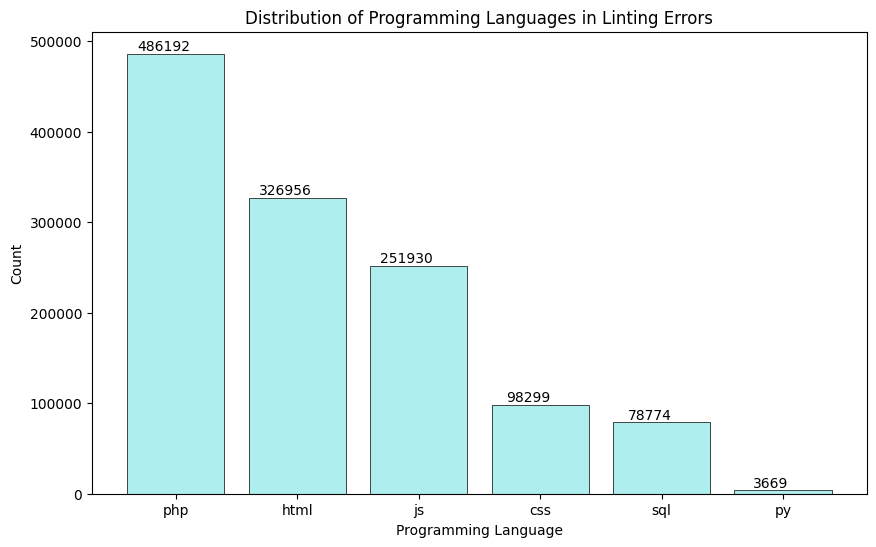

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter the dataset for different language types
languages_to_plot = ['php', 'html', 'sql', 'js', 'css', 'py']
filtered_counts = language_counts_linting[language_counts_linting.index.isin(languages_to_plot)]

# Plot the counts
plt.figure(figsize=(10, 6))
bars = plt.bar(filtered_counts.index, filtered_counts, color='paleturquoise', edgecolor='black', linewidth=0.5)
plt.xlabel('Programming Language')
plt.ylabel('Count')
plt.title('Distribution of Programming Languages in Linting Errors')
# Add total count on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.05, str(int(bar.get_height())), ha='center', va='bottom')

plt.show()


In summary, our analysis indicates that while programming languages differ, linting errors show a consistent pattern across them. PHP exhibits the highest error count, closely followed by HTML. This underscores the universal importance of adhering to coding standards for cleaner, more maintainable code.

The top 20 linting error codes

In [12]:
for language, count in language_counts_linting.items():
    # Filter linting error data for each language
    language_data = data_linting_result[data_linting_result['file_name'].str.endswith(f'.{language}')]

    # Get linting error codes for the current language based on 'message' column
    error_codes = language_data['message'].value_counts()

    # Print the results for the top 20 linting error codes
    print(f'Top 20 {language.upper()} Linting Error Codes:')
    print(error_codes.head(20))
    print('\n')

Top 20 PHP Linting Error Codes:
Expected at least 1 space before "."; 0 found                      19739
Expected at least 1 space after "."; 0 found                       16569
Expected 1 space(s) after closing parenthesis; found 0             16504
Expected 1 space after closing brace; newline found                16030
Line indented incorrectly; expected 0 spaces, found 4              15888
Line indented incorrectly; expected at least 4 spaces, found 0     13219
Line indented incorrectly; expected at least 8 spaces, found 4     11564
Space before opening parenthesis of function call prohibited       11192
Line indented incorrectly; expected 4 spaces, found 0              10935
Header blocks must be separated by a single blank line             10798
Blank line found at start of control structure                     10629
Expected 1 space(s) after closing parenthesis; found newline       10563
Opening brace should be on a new line                              10454
Line indented incor

## Visualizing the linting errors per linting type
We can use this information to find out what the most common linting error is and in what language.

In [15]:
# Extracting language names from 'file_name'
data_linting_result['language'] = data_linting_result['file_name'].str.extract(r'\.(\w+)$')

# Counting occurrences of each linting message per language
linting_message_counts = data_linting_result.groupby(['language', 'message']).size().reset_index(name='count')

# Finding the top 20 linting messages per language
top_messages_per_language = linting_message_counts.groupby('language').apply(lambda x: x.nlargest(20, 'count')).reset_index(drop=True)

# Sorting the table by language and count
top_messages_per_language = top_messages_per_language.sort_values(by=['language', 'count'], ascending=[True, False])

# Create a new DataFrame for the table
table_data = top_messages_per_language[['language', 'message', 'count']]

# Set the text color and border color
text_color = '#56C596'
border_color = '#191A24'

# Create the table figure
fig = go.Figure(data=[go.Table(
    header=dict(values=['<b>Language<b>', '<b>Message<b>', '<b>Count<b>'],
                fill_color=border_color,  # Set border color for header
                line_color=border_color,  # Set border color for header
                font=dict(color=text_color),  # Set text color for header
                align='left'),
    cells=dict(values=[table_data['language'], table_data['message'], table_data['count']],
               fill_color='#232448',
               line_color=border_color,  # Set border color for cells
               font=dict(color=text_color),  # Set text color for cells
               align='left'))
])

# Set layout properties for a scrollable table
fig.update_layout(
    height=600,
    autosize=True,
    margin=dict(l=0, r=0, b=0, t=0),
)

fig.show()


## Visualizing blast error's
Making the visual more specific by sepporate the linting and blast issues, here are the blast error's;

C:\Users\mitzb\AppData\Local\Temp\ipykernel_19036\4214042286.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



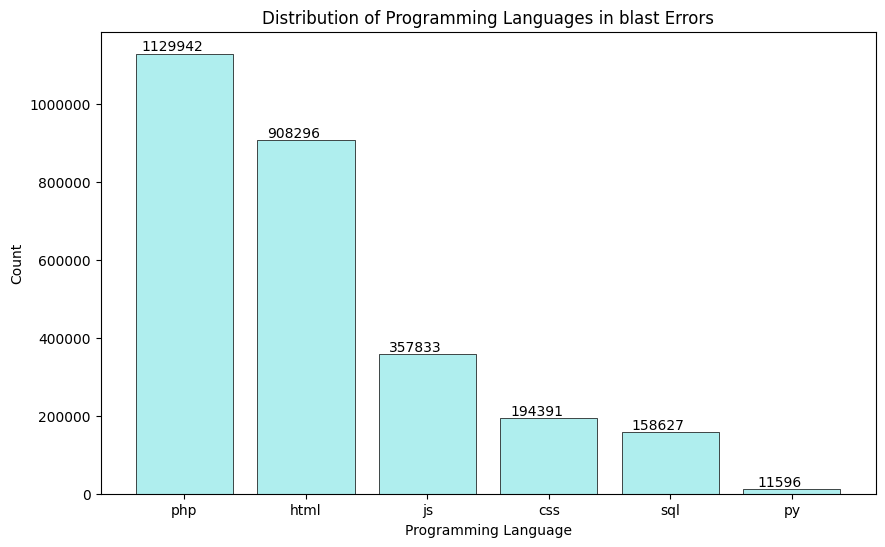

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert blast_review_id to lowercase and remove leading/trailing spaces
data_review_test_results['blast_review_id'] = data_review_test_results['blast_review_id'].str.lower().str.strip()
data_linting_result['blast_review_id'] = data_linting_result['blast_review_id'].str.lower().str.strip()

# Merge DataFrames on blast_review_id
merged_data = pd.merge(data_review_test_results, data_linting_result, on="blast_review_id", how="inner")

# Drop rows where only blast_review_id is present and not test_id
merged_data.dropna(subset=["test_id"], inplace=True)

# Extracting language names from 'file_name' and counting occurrences
language_counts = merged_data['file_name'].str.extract(r'\.(\w+)$').loc[:, 0].value_counts()

# Filter the dataset for different language types
languages_to_plot = ['php', 'html', 'sql', 'js', 'css', 'py']
filtered_counts = language_counts[language_counts.index.isin(languages_to_plot)]

# Plot the counts
plt.figure(figsize=(10, 6))
bars = plt.bar(filtered_counts.index, filtered_counts, color='paleturquoise', edgecolor='black', linewidth=0.5)
plt.xlabel('Programming Language')
plt.ylabel('Count')
plt.title('Distribution of Programming Languages in blast Errors')

# Set y-axis format to display whole numbers
plt.ticklabel_format(axis='y', style='plain')

# Add total count on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.05, str(int(bar.get_height())), ha='center', va='bottom')

plt.show()


It is evident from the data that there are significantly more occurrences of blast errors than linting errors. PHP stands out as the programming language with the highest incidence of errors, followed closely by HTML. This observation underscores the importance of thorough testing and error handling, particularly in PHP and HTML development environments.